# Data Engineering

## Creation of base dataset


In [3]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
sys.path.append(r"data")
import scrape_data

ModuleNotFoundError: No module named 'scrape_data'

In [4]:
try: 
    df = pd.read_csv(r'..\data\district_data\adilabad.csv')
except FileNotFoundError as e:
    scrape_data.create_datasets()
    df = pd.read_csv(r'..\data\district_data\adilabad.csv')

In [5]:
df.date = pd.to_datetime(df.date, format=r"%Y%m%d")
df['month'] = df.date.dt.month
df

,date,T2M,RH2M,WS2M,WD2M,ALLSKY_KT,GWETTOP,EVLAND,PS,PRECIPITATIONCAL,MEI,PC1,PC2,amplitude,month
0,2015-01-01,23.55,65.12,1.75,130.69,0.38,0.37,9.94,97.12,24.31,0.23,-1.40015,0.96675,1.70148,1
1,2015-01-02,23.34,71.88,1.88,141.00,0.43,0.54,17.78,97.40,1.00,0.23,-1.74316,1.00767,2.01346,1
2,2015-01-03,20.17,88.62,1.87,154.25,0.16,0.66,14.37,97.60,3.82,0.23,-2.03657,1.02990,2.28217,1
3,2015-01-04,20.72,74.56,2.25,73.00,0.34,0.56,18.38,97.74,0.00,0.23,-2.26712,1.02739,2.48905,1
4,2015-01-05,18.68,59.81,2.09,18.50,0.66,0.53,16.19,97.75,0.00,0.23,-2.42346,0.99678,2.62044,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2021-12-27,21.01,73.19,0.92,113.75,0.40,0.59,17.79,97.73,0.00,-1.21,-0.70756,0.47105,0.85002,12
2553,2021-12-28,21.53,79.25,1.87,172.38,0.45,0.60,20.85,97.62,3.24,-1.21,-0.65159,0.47253,0.80489,12
2554,2021-12-29,20.45,83.62,1.76,184.44,0.38,0.62,18.86,97.65,0.00,-1.21,-0.55501,0.44320,0.71026,12
2555,2021-12-30,18.71,83.50,2.71,53.75,0.44,0.61,15.57,97.98,0.00,-1.21,-0.42160,0.38602,0.57163,12


## Cleaning

In [6]:
df.replace(-999.0,np.nan, inplace=True)
for i in df.columns.drop('date'):
    df[i] = df[i].interpolate(method='linear')
df

,date,T2M,RH2M,WS2M,WD2M,ALLSKY_KT,GWETTOP,EVLAND,PS,PRECIPITATIONCAL,MEI,PC1,PC2,amplitude,month
0,2015-01-01,23.55,65.12,1.75,130.69,0.38,0.37,9.94,97.12,24.31,0.23,-1.40015,0.96675,1.70148,1
1,2015-01-02,23.34,71.88,1.88,141.00,0.43,0.54,17.78,97.40,1.00,0.23,-1.74316,1.00767,2.01346,1
2,2015-01-03,20.17,88.62,1.87,154.25,0.16,0.66,14.37,97.60,3.82,0.23,-2.03657,1.02990,2.28217,1
3,2015-01-04,20.72,74.56,2.25,73.00,0.34,0.56,18.38,97.74,0.00,0.23,-2.26712,1.02739,2.48905,1
4,2015-01-05,18.68,59.81,2.09,18.50,0.66,0.53,16.19,97.75,0.00,0.23,-2.42346,0.99678,2.62044,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2021-12-27,21.01,73.19,0.92,113.75,0.40,0.59,17.79,97.73,0.00,-1.21,-0.70756,0.47105,0.85002,12
2553,2021-12-28,21.53,79.25,1.87,172.38,0.45,0.60,20.85,97.62,3.24,-1.21,-0.65159,0.47253,0.80489,12
2554,2021-12-29,20.45,83.62,1.76,184.44,0.38,0.62,18.86,97.65,0.00,-1.21,-0.55501,0.44320,0.71026,12
2555,2021-12-30,18.71,83.50,2.71,53.75,0.44,0.61,15.57,97.98,0.00,-1.21,-0.42160,0.38602,0.57163,12


## Scaling and Normalization

Standardization: Using the StandardScaler we will scale the following:
 - Temperature (T2M)
 - Wind Speed (WS2M)
 - Clearness Index (ALL_SKY_KT)
 - Soil Surface Moisture (GWETTOP)
 - Evapotranspiration Rate (EVLAND)
 - Surface Pressure (PS)
 - Precipitation (PRECIPITATIONCAL)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
standard_scaler = StandardScaler()
standard_scaling_cols = ['T2M',
                        'WS2M',
                        'ALLSKY_KT',
                        'GWETTOP',
                        'EVLAND',
                        'PS',
                        'PRECIPITATIONCAL']

df[standard_scaling_cols] = standard_scaler.fit_transform(df[standard_scaling_cols])
df


,date,T2M,RH2M,WS2M,WD2M,ALLSKY_KT,GWETTOP,EVLAND,PS,PRECIPITATIONCAL,MEI,PC1,PC2,amplitude,month
0,2015-01-01,-0.685396,65.12,-0.449193,130.69,-1.208373,-0.487223,-0.675257,0.112521,2.249497,0.23,-1.40015,0.96675,1.70148,1
1,2015-01-02,-0.727393,71.88,-0.311153,141.00,-0.840644,0.160753,-0.321738,0.701933,-0.214321,0.23,-1.74316,1.00767,2.01346,1
2,2015-01-03,-1.361347,88.62,-0.321772,154.25,-2.826383,0.618148,-0.475501,1.122941,0.083747,0.23,-2.03657,1.02990,2.28217,1
3,2015-01-04,-1.251355,74.56,0.081729,73.00,-1.502557,0.236986,-0.294683,1.417647,-0.320019,0.23,-2.26712,1.02739,2.48905,1
4,2015-01-05,-1.659325,59.81,-0.088166,18.50,0.850912,0.122637,-0.393434,1.438698,-0.320019,0.23,-2.42346,0.99678,2.62044,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2021-12-27,-1.193359,73.19,-1.330524,113.75,-1.061281,0.351335,-0.321287,1.396597,-0.320019,-1.21,-0.70756,0.47105,0.85002,12
2553,2021-12-28,-1.089366,79.25,-0.321772,172.38,-0.693552,0.389451,-0.183306,1.165042,0.022443,-1.21,-0.65159,0.47253,0.80489,12
2554,2021-12-29,-1.305351,83.62,-0.438575,184.44,-1.208373,0.465683,-0.273039,1.228193,-0.320019,-1.21,-0.55501,0.44320,0.71026,12
2555,2021-12-30,-1.653326,83.50,0.570178,53.75,-0.767098,0.427567,-0.421391,1.922857,-0.320019,-1.21,-0.42160,0.38602,0.57163,12


Cyclic Encoding:
- Apply Cyclic encoding to the WD2M parameter
- Drop WD2M

In [8]:
df['WD2M_sin'] = np.sin(np.deg2rad(df.WD2M))
df['WD2M_cos'] = np.cos(np.deg2rad(df.WD2M))
df.drop(columns='WD2M', inplace=True)

MinMax Scaling:
Scale Features using that have a given range:
- Relative Humidity scaled down by 100 (since it is a percentage)
- Amplitude to be scaled down by 3 (0-3) is range of Amplitude

In [9]:
df.amplitude = df.amplitude/3
df.RH2M = df.RH2M/100
df

,date,T2M,RH2M,WS2M,ALLSKY_KT,GWETTOP,EVLAND,PS,PRECIPITATIONCAL,MEI,PC1,PC2,amplitude,month,WD2M_sin,WD2M_cos
0,2015-01-01,-0.685396,0.6512,-0.449193,-1.208373,-0.487223,-0.675257,0.112521,2.249497,0.23,-1.40015,0.96675,0.567160,1,0.758248,-0.651966
1,2015-01-02,-0.727393,0.7188,-0.311153,-0.840644,0.160753,-0.321738,0.701933,-0.214321,0.23,-1.74316,1.00767,0.671153,1,0.629320,-0.777146
2,2015-01-03,-1.361347,0.8862,-0.321772,-2.826383,0.618148,-0.475501,1.122941,0.083747,0.23,-2.03657,1.02990,0.760723,1,0.434445,-0.900698
3,2015-01-04,-1.251355,0.7456,0.081729,-1.502557,0.236986,-0.294683,1.417647,-0.320019,0.23,-2.26712,1.02739,0.829683,1,0.956305,0.292372
4,2015-01-05,-1.659325,0.5981,-0.088166,0.850912,0.122637,-0.393434,1.438698,-0.320019,0.23,-2.42346,0.99678,0.873480,1,0.317305,0.948324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2021-12-27,-1.193359,0.7319,-1.330524,-1.061281,0.351335,-0.321287,1.396597,-0.320019,-1.21,-0.70756,0.47105,0.283340,12,0.915311,-0.402747
2553,2021-12-28,-1.089366,0.7925,-0.321772,-0.693552,0.389451,-0.183306,1.165042,0.022443,-1.21,-0.65159,0.47253,0.268297,12,0.132602,-0.991169
2554,2021-12-29,-1.305351,0.8362,-0.438575,-1.208373,0.465683,-0.273039,1.228193,-0.320019,-1.21,-0.55501,0.44320,0.236753,12,-0.077415,-0.996999
2555,2021-12-30,-1.653326,0.8350,0.570178,-0.767098,0.427567,-0.421391,1.922857,-0.320019,-1.21,-0.42160,0.38602,0.190543,12,0.806445,0.591310


## EDA

In [10]:
df

,date,T2M,RH2M,WS2M,ALLSKY_KT,GWETTOP,EVLAND,PS,PRECIPITATIONCAL,MEI,PC1,PC2,amplitude,month,WD2M_sin,WD2M_cos
0,2015-01-01,-0.685396,0.6512,-0.449193,-1.208373,-0.487223,-0.675257,0.112521,2.249497,0.23,-1.40015,0.96675,0.567160,1,0.758248,-0.651966
1,2015-01-02,-0.727393,0.7188,-0.311153,-0.840644,0.160753,-0.321738,0.701933,-0.214321,0.23,-1.74316,1.00767,0.671153,1,0.629320,-0.777146
2,2015-01-03,-1.361347,0.8862,-0.321772,-2.826383,0.618148,-0.475501,1.122941,0.083747,0.23,-2.03657,1.02990,0.760723,1,0.434445,-0.900698
3,2015-01-04,-1.251355,0.7456,0.081729,-1.502557,0.236986,-0.294683,1.417647,-0.320019,0.23,-2.26712,1.02739,0.829683,1,0.956305,0.292372
4,2015-01-05,-1.659325,0.5981,-0.088166,0.850912,0.122637,-0.393434,1.438698,-0.320019,0.23,-2.42346,0.99678,0.873480,1,0.317305,0.948324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2021-12-27,-1.193359,0.7319,-1.330524,-1.061281,0.351335,-0.321287,1.396597,-0.320019,-1.21,-0.70756,0.47105,0.283340,12,0.915311,-0.402747
2553,2021-12-28,-1.089366,0.7925,-0.321772,-0.693552,0.389451,-0.183306,1.165042,0.022443,-1.21,-0.65159,0.47253,0.268297,12,0.132602,-0.991169
2554,2021-12-29,-1.305351,0.8362,-0.438575,-1.208373,0.465683,-0.273039,1.228193,-0.320019,-1.21,-0.55501,0.44320,0.236753,12,-0.077415,-0.996999
2555,2021-12-30,-1.653326,0.8350,0.570178,-0.767098,0.427567,-0.421391,1.922857,-0.320019,-1.21,-0.42160,0.38602,0.190543,12,0.806445,0.591310


<Axes: >

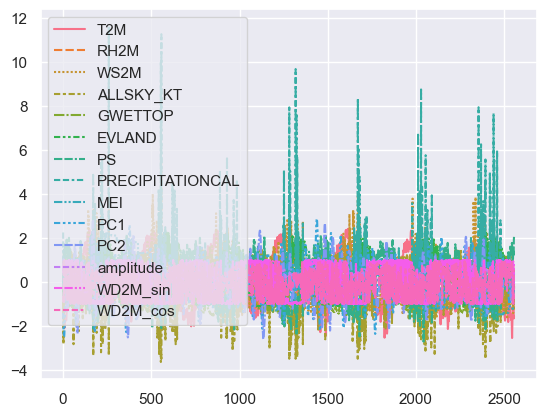

In [79]:
sns.set_theme(style="darkgrid")
sns.lineplot(df.drop(columns='month'))

## Create test Dataset

In [11]:
import json
import requests
import numpy as np
url =  "https://power.larc.nasa.gov/api/temporal/daily/point"

params = {
    "parameters":'T2M',
    "start": "20220101", #Get data from 2015 because we use standard scaler to scale, and test data is from 2015 to 2021
    "end": "20221231",
    "community": "RE",
    "latitude": str(19.67),
    "longitude": str(78.53),
    "user":"DAVEDownload",
    "format":"JSON",
    
}

response = requests.get(url, params=params)
json_data = json.loads(response.text)
json_data['properties']['parameter']
test_df = pd.DataFrame(json_data['properties']['parameter'])
# test_df.replace(-999.0, np.nan, inplace=True)
test_df['date'] = test_df.index
test_df['date'] = pd.to_datetime(test_df.date, format=r"%Y%m%d")
test_df.replace(-999.0,np.nan, inplace=True)
test_df['T2M'] = test_df['T2M'].interpolate(method='linear')
test_df['T2M'] = StandardScaler().fit_transform(test_df['T2M'].to_numpy().reshape(-1,1))
test_df


# test_df['month'] = test_df.date.dt.month
# test_df

,T2M,date
20220101,-1.176993,2022-01-01
20220102,-1.147700,2022-01-02
20220103,-1.297613,2022-01-03
20220104,-1.244196,2022-01-04
20220105,-1.049481,2022-01-05
...,...,...
20221227,-0.442935,2022-12-27
20221228,-0.563555,2022-12-28
20221229,-1.020187,2022-12-29
20221230,-0.734146,2022-12-30


# Darts NLinear Model

## Baseline Model

## Full fledged model

In [2]:
import pandas as pd
from darts import TimeSeries

series = TimeSeries.from_dataframe(df, "date", df.columns.drop('date'))

train_series = series

NameError: name 'df' is not defined

In [107]:
test_series = TimeSeries.from_dataframe(test_df, "date", "T2M")

In [118]:
from darts.models import  NLinearModel
print(len(train_series))
model = NLinearModel(input_chunk_length=len(train_series)-30,
                     output_chunk_length=30,
                     add_encoders={
                        'cyclic': {'future': ['month']},
                        },
                     pl_trainer_kwargs={
                        "accelerator": "gpu",
                        "devices": [0]
                      },
                      log_tensorboard=True
                    )
model.fit(train_series)


2557


MisconfigurationException: No supported gpu backend found!

In [12]:
prediction = model.predict(365)

NameError: name 'model' is not defined

In [1]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
# series[['T2M']].plot()
test_series['T2M'].plot()
prediction[['T2M']].plot(label="forecast")
plt.legend()

NameError: name 'test_series' is not defined

<Figure size 1500x1500 with 0 Axes>

In [ ]:
from darts.metrics import mape, mase, smape, mse, rmse

# assume `actual` and `forecast` are the actual and forecasted time series data
actual = ['T2M']


# Calculate performance metrics
mape_val = mape(actual, forecast)
mase_val = mase(actual, forecast)
smape_val = smape(actual, forecast)
mse_val = mse(actual, forecast)
rmse_val = rmse(actual, forecast)

# Pretty print the results
print(f"MAPE: {mape_val:.4f}")
print(f"MASE: {mase_val:.4f}")
print(f"SMAPE: {smape_val:.4f}")
print(f"MSE: {mse_val:.4f}")
print(f"RMSE: {rmse_val:.4f}")

ValueError: DataFrame constructor not properly called!